In [1]:
"""
This notebook generates the log L2 ref - alt plots for diQTLs (Fig. 3A).
For example track and DeepSHAP plots, please see the example tracks directory.
"""

'\nThis notebook generates the log L2 ref - alt plots for diQTLs (Fig. 3A).\nFor example track and DeepSHAP plots, please see the example tracks directory.\n'

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [7]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "qtl_analysis.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR} -C {SCRATCH}")

wget https://zenodo.org/records/10597358/files/qtl_analysis.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/qtl_analysis.tar.gz -C /Users/adamhe/github/scratch


In [8]:
# Load data

individual_folds = np.log10(
    pd.read_csv(
        os.path.join(SCRATCH, "qtl_analysis/diqtls_individual_folds_l2_scores.csv.gz"),
        index_col=0
    ) 
    + 1e-3
)
ensembled = np.log10(
    pd.read_csv(
        os.path.join(SCRATCH, "qtl_analysis/diqtls_ensemble_l2_scores.csv.gz"),
        index_col=0
    ) 
    + 1e-3
)
composite = pd.concat([individual_folds, ensembled.loc[~ensembled.index.isin(individual_folds.index)]])

PearsonRResult(statistic=0.5418812412686588, pvalue=4.6404873250573775e-93)
[[0.81918686]]


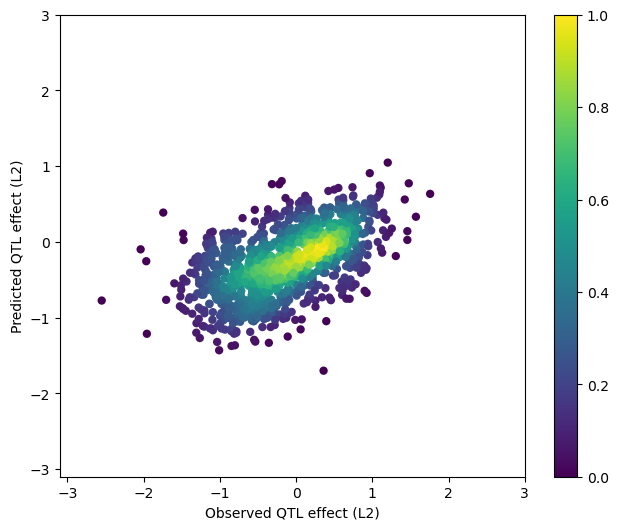

In [10]:
# Plot composite log L2 ref - alt scores

fig = plt.figure(figsize=(7.5, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(
    data=composite,
    x="expt",
    y="pred",
    c=gaussian_kde(composite.transpose())(composite.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3.1, 3)
ax.set_ylim(-3.1, 3)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)
plt.savefig("img/diqtl_composite_l2.pdf")

print(pearsonr(composite.expt, composite.pred))
print(
    LinearRegression(fit_intercept=True).fit(
        composite.pred.to_numpy().reshape(-1, 1),
        composite.expt.to_numpy().reshape(-1, 1)
    ).coef_
)

PearsonRResult(statistic=0.5796232285979914, pvalue=2.939788087876316e-109)
[[0.86305925]]


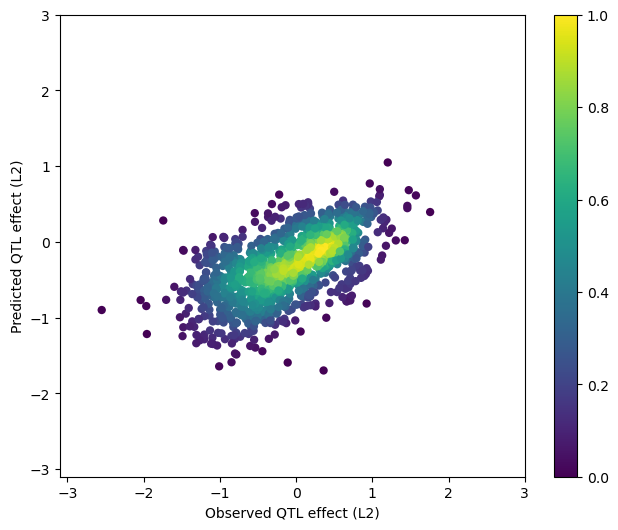

In [12]:
# Plot ensembled log L2 ref - alt scores (not used in paper)

fig, ax = plt.subplots(figsize=(7.5, 6))
ax = sns.scatterplot(
    data=ensembled,
    x="expt",
    y="pred",
    c=gaussian_kde(ensembled.transpose())(ensembled.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3.1, 3)
ax.set_ylim(-3.1, 3)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)
plt.savefig("img/diqtl_ensembled_l2.pdf")

print(pearsonr(ensembled.expt, ensembled.pred))
print(
    LinearRegression(fit_intercept=True).fit(
        ensembled.pred.to_numpy().reshape(-1, 1),
        ensembled.expt.to_numpy().reshape(-1, 1)
    ).coef_
)